In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shree1992/housedata")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Lenovo\.cache\kagglehub\datasets\shree1992\housedata\versions\2


In [3]:
import pandas as pd 
df=pd.read_csv(r'C:\Users\Lenovo\.cache\kagglehub\datasets\shree1992\housedata\versions\2\data.csv')

In [4]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [5]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [7]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [30]:
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np


C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='log_price', ylabel='Count'>

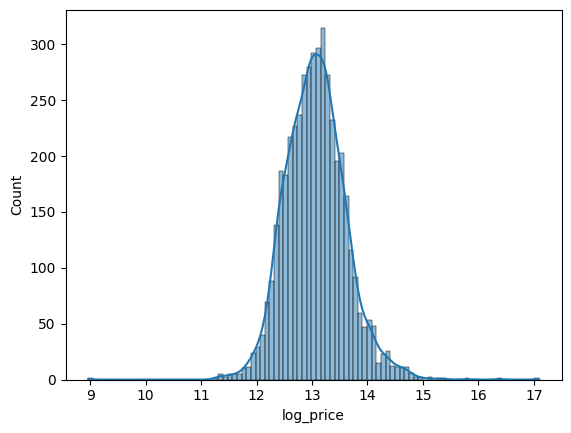

In [31]:
df['log_price']= np.log(df['price'])
sns.histplot(df['log_price'],kde=True)

In [ ]:
#for skiwness we do logtransgorm 
import numpy as np
df['log_price']=np.log(df['price'])

C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


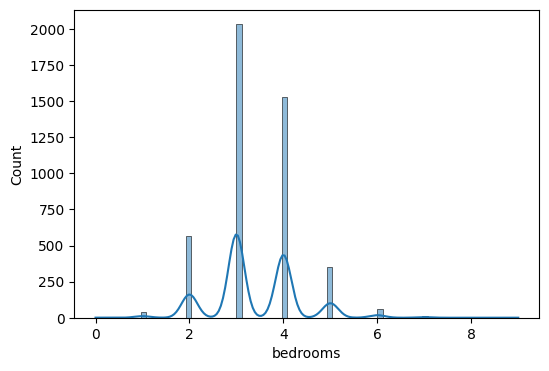

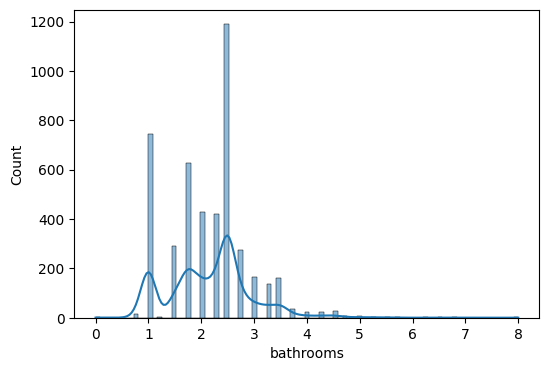

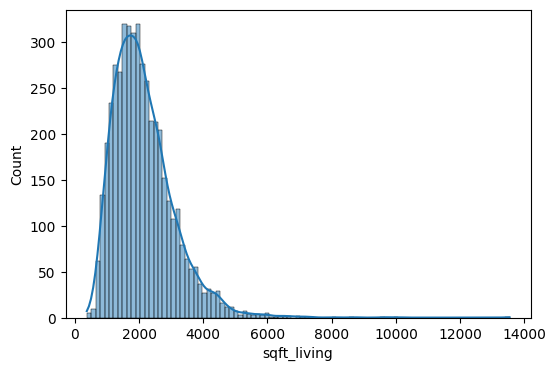

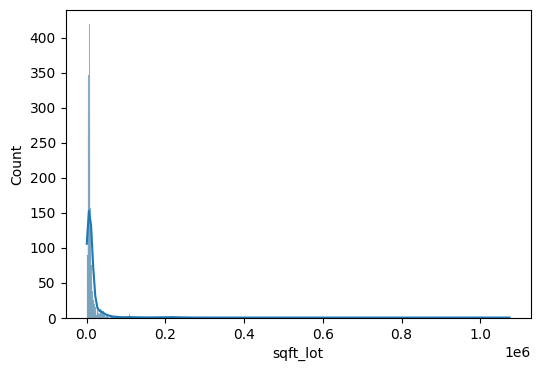

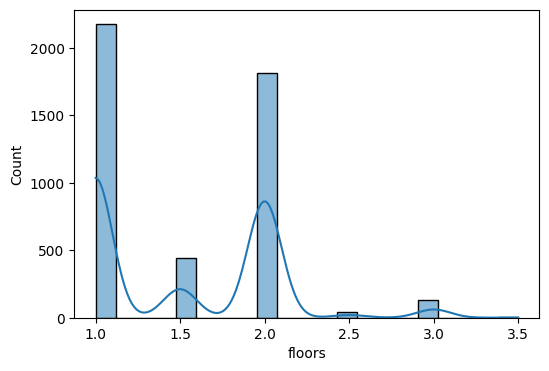

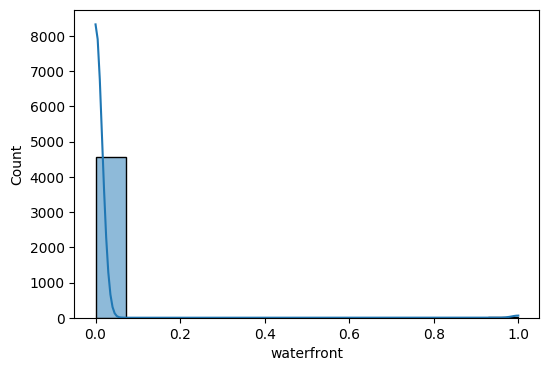

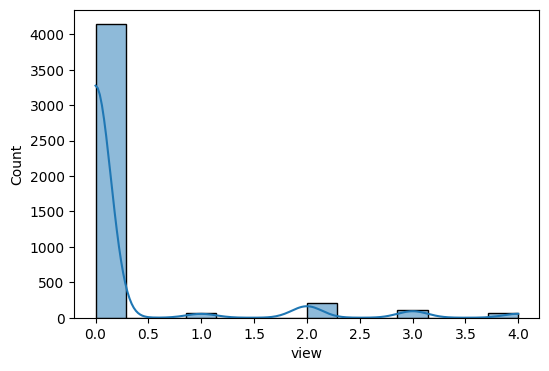

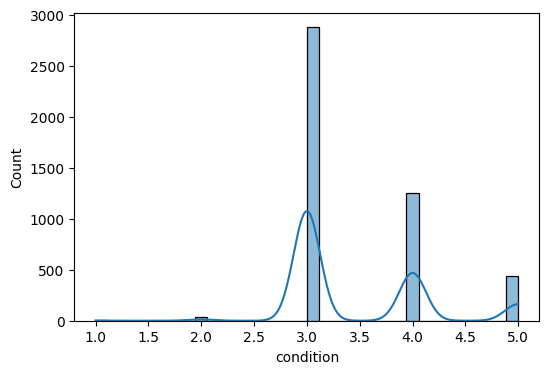

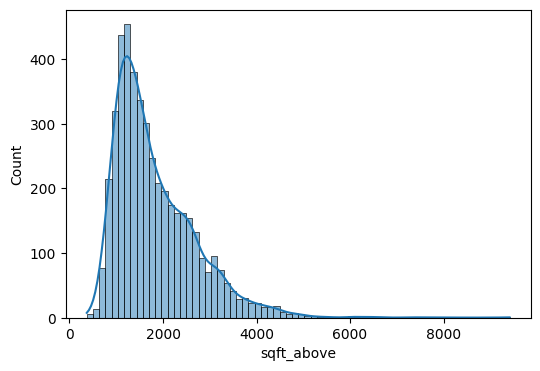

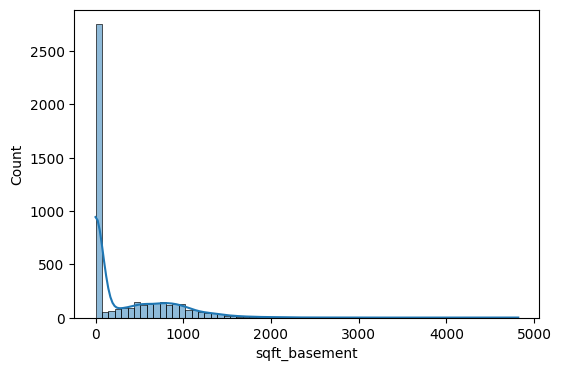

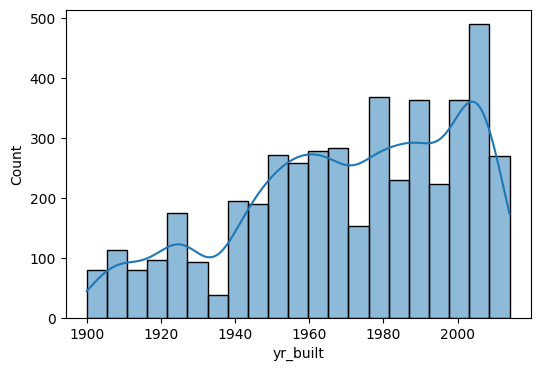

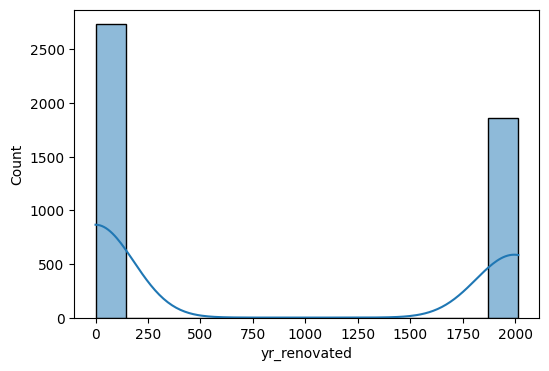

In [ ]:
numeric_col=['bedrooms','bathrooms','sqft_living','sqft_lot','floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']
for col in numeric_col:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col],kde=True)

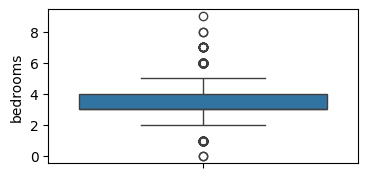

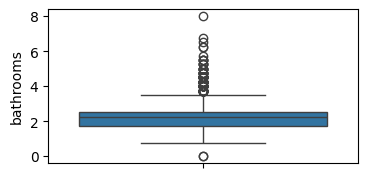

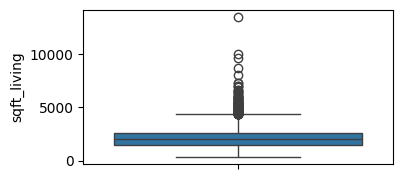

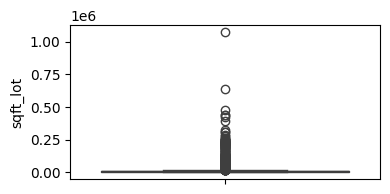

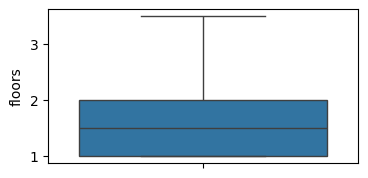

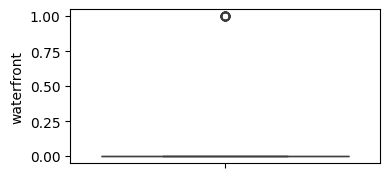

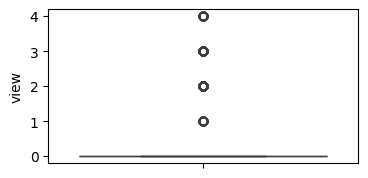

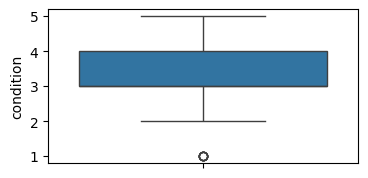

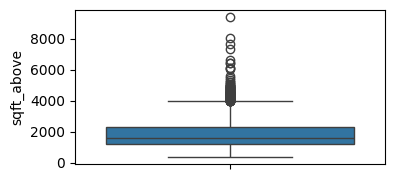

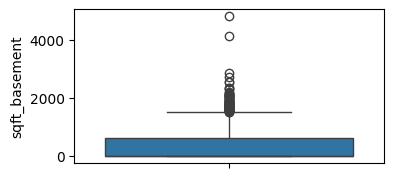

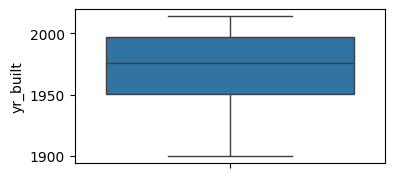

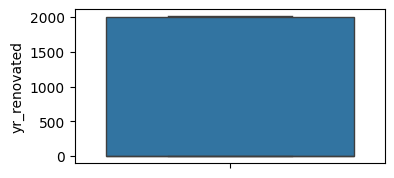

In [ ]:
numeric_col=['bedrooms','bathrooms','sqft_living','sqft_lot','floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']
for col in numeric_col:
    plt.figure(figsize=(4,2))
    sns.boxplot(df[col])

In [ ]:
df['sqft_living']   = np.log(df['sqft_living'])
df['sqft_lot']      = np.log(df['sqft_lot'])
df['sqft_above']    = np.log(df['sqft_above'])
df['sqft_basement'] = np.log1p(df['sqft_basement'])  # safer


In [ ]:
df['yr_renovated_binary'] = df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)
print(df['yr_renovated_binary'].value_counts())

yr_renovated_binary
0    2735
1    1865
Name: count, dtype: int64


<Axes: ylabel='yr_renovated_binary'>

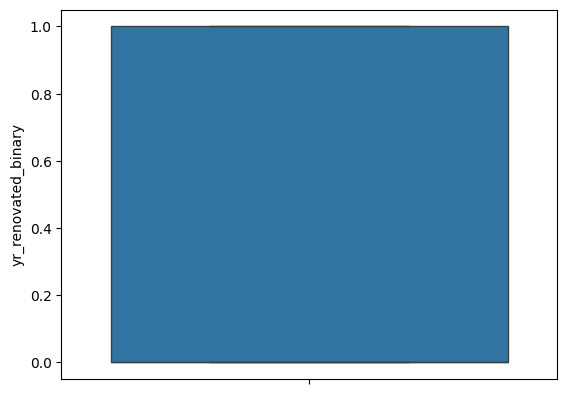

In [ ]:
sns.boxplot(df['yr_renovated_binary'],)

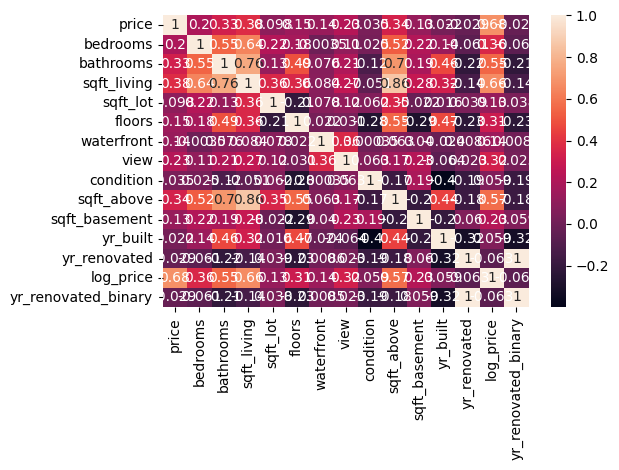

In [ ]:
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.tight_layout()
plt.show()

In [ ]:
df_needed_numeric=df[['sqft_living', 'bathrooms', 'bedrooms', 'floors', 
 'waterfront', 'view', 'yr_built','sqft_basement', 'yr_renovated_binary']]

In [ ]:
df_needed_numeric.head()

,sqft_living,bathrooms,bedrooms,floors,waterfront,view,yr_built,sqft_basement,yr_renovated_binary
0,7.200425,1.50,3.0,1.5,0,0,1955,0.000000,1
1,8.202482,2.50,5.0,2.0,0,4,1921,5.638355,0
2,7.565275,2.00,3.0,1.0,0,0,1966,0.000000,0
3,7.600902,2.25,3.0,1.0,0,0,1963,6.908755,0
4,7.570443,2.50,4.0,1.0,0,0,1976,6.685861,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 4600 non-null   object 
 1   price                4600 non-null   float64
 2   bedrooms             4600 non-null   float64
 3   bathrooms            4600 non-null   float64
 4   sqft_living          4600 non-null   float64
 5   sqft_lot             4600 non-null   float64
 6   floors               4600 non-null   float64
 7   waterfront           4600 non-null   int64  
 8   view                 4600 non-null   int64  
 9   condition            4600 non-null   int64  
 10  sqft_above           4600 non-null   float64
 11  sqft_basement        4600 non-null   float64
 12  yr_built             4600 non-null   int64  
 13  yr_renovated         4600 non-null   int64  
 14  street               4600 non-null   object 
 15  city                 4600 non-null   o

In [12]:
df_cat=[['date','street','city','statezip','country']]

In [13]:
df['statezip'].value_counts()

statezip
WA 98103    148
WA 98052    135
WA 98117    132
WA 98115    130
WA 98006    110
           ... 
WA 98047      6
WA 98288      3
WA 98050      2
WA 98354      2
WA 98068      1
Name: count, Length: 77, dtype: int64

In [14]:
#this is unwanted 
df.drop(['street', 'country'], axis=1, inplace=True)


In [15]:
df['date'] = pd.to_datetime(df['date'])
df['year_sold'] = df['date'].dt.year
df['month_sold'] = df['date'].dt.month


In [16]:
df['year_sold'].value_counts()
df['month_sold'].head()

0    5
1    5
2    5
3    5
4    5
Name: month_sold, dtype: int32

In [17]:
df.drop(['year_sold','month_sold','date'], axis=1, inplace=True)


In [18]:
#now we split the state and and zip code
df[['state','zipcode']]=df['statezip'].str.split(" ",expand=True)


In [19]:
df.drop('statezip',axis=1,inplace=True)

In [20]:
df.drop(['sqft_lot', 'sqft_above', 'condition', 'yr_renovated'],axis=1,inplace=True)

In [21]:

# Encode 'city' using frequency encoding
df['city_freq'] = df['city'].map(df['city'].value_counts())
df.drop('city', axis=1, inplace=True)

In [22]:
df['city_freq'].value_counts()


city_freq
1573    1573
187      374
293      293
286      286
235      235
185      185
176      176
175      175
148      148
123      123
115      115
96        96
29        87
86        86
74        74
71        71
33        66
66        66
58        58
50        50
43        43
42        42
36        36
11        33
28        28
22        22
18        18
9          9
7          7
6          6
5          5
2          4
4          4
1          3
3          3
Name: count, dtype: int64

In [23]:
df['zipcode']=df['zipcode'].astype(int)

In [24]:
df['city_freq']=df['city_freq'].astype(int)

In [25]:
df.drop('state',axis=1,inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   float64
 4   floors         4600 non-null   float64
 5   waterfront     4600 non-null   int64  
 6   view           4600 non-null   int64  
 7   sqft_basement  4600 non-null   float64
 8   yr_built       4600 non-null   float64
 9   zipcode        4600 non-null   int64  
 10  city_freq      4600 non-null   int64  
dtypes: float64(7), int64(4)
memory usage: 395.4 KB


In [27]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
num_features = ['bedrooms','bathrooms','sqft_living','floors','sqft_basement','yr_built']
df[num_features] = st.fit_transform(df[num_features])


In [32]:
df.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,sqft_basement,yr_built,zipcode,city_freq,log_price
0,313000.0,-0.441122,-0.843204,-0.829971,-0.022416,0,0,-0.672464,-0.531014,98133,123,12.653958
1,2384000.0,1.759705,0.432802,1.568528,0.906555,0,4,-0.069128,-1.674693,98119,1573,14.684290
2,342000.0,-0.441122,-0.205201,-0.217367,-0.951388,0,0,-0.672464,-0.161000,98042,185,12.742566
3,420000.0,-0.441122,0.113800,-0.144686,-0.951388,0,0,1.482306,-0.261913,98008,286,12.948010
4,550000.0,0.659291,0.432802,-0.206984,-0.951388,0,0,1.051352,0.175376,98052,235,13.217674


In [29]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront',
       'view', 'sqft_basement', 'yr_built', 'zipcode', 'city_freq'],
      dtype='object')

In [55]:
x=df.drop(['price','log_price'],axis=1)

In [56]:
y=df[['log_price']]


In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)


In [59]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model=lr.fit(x_train,y_train) 
model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [54]:
# Step 1: Drop invalid prices (0 or negative)
df = df[df['price'] > 0].copy()

# Step 2: Recompute log_price fresh
df['log_price'] = np.log(df['price'])

# Step 3: Drop any rows with inf or NaN (just in case)
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna(subset=['log_price'])

# Step 4: Double-check
print("Max y:", df['log_price'].max())
print("Min y:", df['log_price'].min())
print("Any inf in y?", np.isinf(df['log_price']).sum())
print("Any NaN in y?", df['log_price'].isna().sum())





Max y: 17.0960457632192
Min y: 8.961879012677683
Any inf in y? 0
Any NaN in y? 0


In [62]:
y_test

,log_price
471,14.018451
2518,13.115846
23,13.325304
3922,12.487485
135,13.329378
...,...
3357,13.183458
1350,13.033532
3213,12.460715
979,14.058457


In [61]:
y_predict=model.predict(x_test)
y_predict

array([[14.31284728],
       [13.10123239],
       [13.2303506 ],
       ...,
       [12.35810551],
       [13.60249404],
       [12.83005049]], shape=(1502, 1))

In [ ]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_predict)
n=x_test.shape[0]
p=x_test.shape[1]
Adjusted_r2=1-(1-r2)*(n-1)/(n-p-1)



In [66]:
Adjusted_r2

0.5426417994367059

In [67]:
y1=df['price']

In [68]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x,y1,test_size=0.33,random_state=42)


In [78]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model1=lr.fit(x_train1,y_train1) 
model1

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [79]:
y_predict=model1.predict(x_test1)
y_predict

array([1478245.17924078,  623078.18963182,  657627.15344876, ...,
        145384.97232579,  956454.2679354 ,  374275.58827825],
      shape=(1502,))

In [80]:
from sklearn.metrics import r2_score
r2=r2_score(y_test1,y_predict)
n=x_test.shape[0]
p=x_test.shape[1]
Adjusted_r2=1-(1-r2)*(n-1)/(n-p-1)

In [81]:
Adjusted_r2

0.5939413934782978

In [74]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha=1.0)
ridge.fit(x_train, y_train)
print("R² Ridge:", ridge.score(x_test, y_test))

lasso = Lasso(alpha=0.01)
lasso.fit(x_train, y_train)
print("R² Lasso:", lasso.score(x_test, y_test))


R² Ridge: 0.5456070170206099
R² Lasso: 0.5438008541234989


In [82]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200, random_state=42)
model2=rf.fit(x_train, y_train)
print("R² RF:", model2.score(x_test, y_test))


C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


R² RF: 0.7177664080429099


In [83]:
y1_predict=model2.predict(x_test)

In [84]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y1_predict)
n=x_test.shape[0]
p=x_test.shape[1]
Adjusted_r2=1-(1-r2)*(n-1)/(n-p-1)

In [85]:
Adjusted_r2

0.715873493274586

In [86]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront',
       'view', 'sqft_basement', 'yr_built', 'zipcode', 'city_freq',
       'log_price'],
      dtype='object')